Loading training data...
Total images loaded: 8005
Training data shape: (6404, 64, 64, 3)
Validation data shape: (1601, 64, 64, 3)

--- Training the CNN Model ---


C:\Users\shres\anaconda3\envs\cat_dog_svm\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.5302 - loss: 0.6950 - val_accuracy: 0.6490 - val_loss: 0.6424
Epoch 2/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 21s 103ms/step - accuracy: 0.6551 - loss: 0.6267 - val_accuracy: 0.7096 - val_loss: 0.5768
Epoch 3/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - accuracy: 0.7127 - loss: 0.5570 - val_accuracy: 0.7458 - val_loss: 0.5213
Epoch 4/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.7726 - loss: 0.4772 - val_accuracy: 0.7751 - val_loss: 0.4868
Epoch 5/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.8071 - loss: 0.4166 - val_accuracy: 0.7577 - val_loss: 0.5199
Epoch 6/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 24s 120ms/step - accuracy: 0.8356 - loss: 0.3676 - val_accuracy: 0.7358 - val_loss: 0.5346
Epoch 7/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.8655 - loss: 0.3141 - val_accuracy: 0.7527 - val_loss: 0.5596
Epoch 8/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.8942 - loss: 0

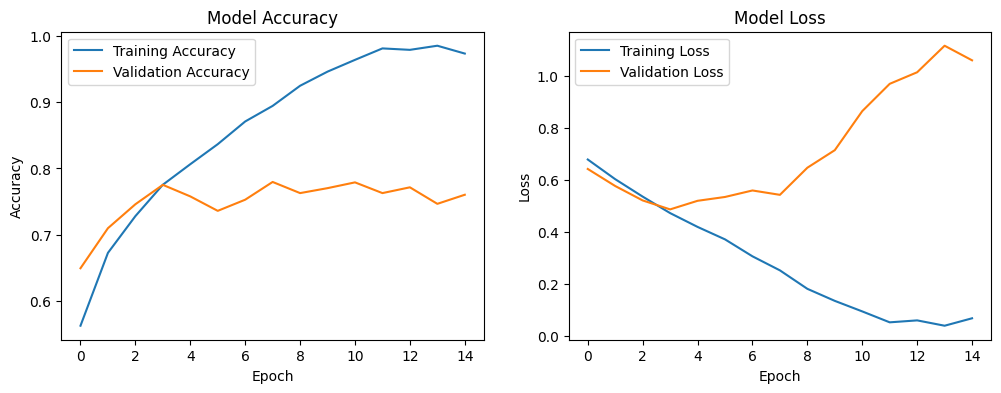


--- Evaluating on Test Set ---
Final Test Accuracy: 0.7731
Final Test Loss: 1.0918

--- Visualizing Sample Predictions from Test Set ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


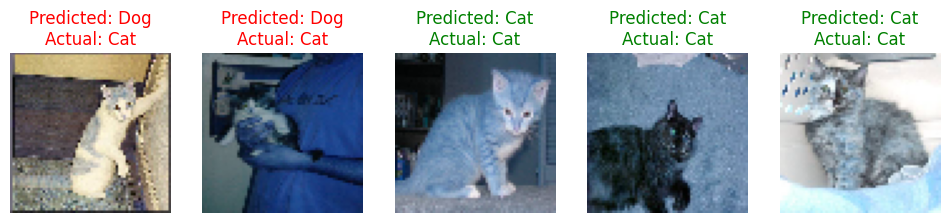

In [1]:
# ================================================================
# Phase 1: Project Setup and Data Handling
# This code block uses a CNN for high accuracy image classification.
# ================================================================

# Fix for visualization display issues in Jupyter
%matplotlib inline

# ✅ Import Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# ✅ Define dataset paths
train_dir = r"C:\Users\shres\Downloads\training_set\training_set"
test_dir = r"C:\Users\shres\Downloads\test_set\test_set"

# ✅ Define a new function to load and preprocess images for CNN
def load_images_for_cnn(folder_path):
    """
    Loads images, resizes them, and prepares them for a CNN.
    """
    images = []
    labels = []
    
    # Path for cats
    cats_path = os.path.join(folder_path, 'cats')
    if os.path.isdir(cats_path):
        for filename in os.listdir(cats_path):
            img_path = os.path.join(cats_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                images.append(img)
                labels.append(0) # 0 for cats
                
    # Path for dogs
    dogs_path = os.path.join(folder_path, 'dogs')
    if os.path.isdir(dogs_path):
        for filename in os.listdir(dogs_path):
            img_path = os.path.join(dogs_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                images.append(img)
                labels.append(1) # 1 for dogs
                
    return np.array(images), np.array(labels)

# ✅ Load all data at once for easier splitting
print("Loading training data...")
X, y = load_images_for_cnn(train_dir)
print(f"Total images loaded: {len(X)}")

# ✅ Normalize pixel values to be between 0 and 1
X = X.astype('float32') / 255.0

# ✅ Convert labels to one-hot encoding for Keras
y_categorical = to_categorical(y, num_classes=2)

# ✅ Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y)
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

# ================================================================
# Phase 2: Building and Training the CNN Model
# ================================================================

# ✅ Define the CNN model architecture
# This architecture is designed to learn complex features from images
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # 2 output classes (cat and dog)
])

# ✅ Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Train the model and save the history
print("\n--- Training the CNN Model ---")
# Training will take several minutes and is the key to high accuracy
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))
print("\n--- CNN Model training complete ---")

# ================================================================
# Phase 3: Visualization of Results
# ================================================================

# ✅ Visualize training history (Accuracy and Loss)
print("\n--- Visualizing Training History ---")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ✅ Load test data and evaluate the model
print("\n--- Evaluating on Test Set ---")
X_test, y_test = load_images_for_cnn(test_dir)
X_test = X_test.astype('float32') / 255.0
y_test_categorical = to_categorical(y_test, num_classes=2)

test_loss, test_acc = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"Final Test Accuracy: {test_acc:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")

# ✅ Visualize Sample Predictions
print("\n--- Visualizing Sample Predictions from Test Set ---")
predictions_to_show = 5
predictions = model.predict(X_test[:predictions_to_show])

plt.figure(figsize=(12, 6))
for i in range(predictions_to_show):
    plt.subplot(1, predictions_to_show, i + 1)
    plt.imshow(X_test[i]) 
    
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    
    title_color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"Predicted: {'Dog' if predicted_label == 1 else 'Cat'}\nActual: {'Dog' if true_label == 1 else 'Cat'}", color=title_color)
    plt.axis('off')
plt.show()